In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the training images
train_images_dir = '/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/train'
image_size=224

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2, 
    shear_range=0.2,
    zoom_range=0.2,  
    horizontal_flip=True,  
    brightness_range=[0.8, 1.2], 
    rotation_range=15,  
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    fill_mode='nearest',  
    channel_shift_range=5.0,  
)


# Create the training generator for training data
train_generator = train_datagen.flow_from_directory(
    train_images_dir,  # Path to the training images
    target_size=(image_size, image_size),  # Resize images to target size (set image_size beforehand)
    batch_size=32,  # Number of images to process in each batch
    class_mode='categorical',  # For multi-class classification
    subset='training',  # Set subset to 'training' for training data
        shuffle=True,  # Shuffle data after each epoch
)

# Create the validation generator
validation_generator = train_datagen.flow_from_directory(
    train_images_dir,  # Path to the training images
    target_size=(image_size, image_size),  # Resize images to target size (set image_size beforehand)
    batch_size=32,  # Number of images to process in each batch
    class_mode='categorical',  # For multi-class classification
    subset='validation',  # Set subset to 'validation' for validation data
    shuffle=False,  # Don't shuffle validation data
)


Found 6598 images belonging to 196 classes.
Found 1546 images belonging to 196 classes.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import os

# Required constants
image_size = 224  # Image size (224x224 is the default input size for DenseNet)
batch_size = 32
epochs = 55
num_classes = 196  # Number of classes for classification (replace with actual number of classes)
learning_rate = 0.01

# Load pre-trained DenseNet121 model (without the top layers)
base_model = tf.keras.applications.DenseNet121(
    include_top=False,  # Exclude the fully connected layers at the top
    weights='imagenet',  # Use ImageNet weights
    input_shape=(image_size, image_size, 3)  # Input size (224x224x3)
)

# Freeze the layers in DenseNet to avoid retraining them
base_model.trainable = False

# Build the full model with custom classification head
model = models.Sequential([
    base_model,  # Add DenseNet backbone as base
    layers.GlobalAveragePooling2D(),  # Global average pooling to reduce the spatial dimensions
    layers.Dense(4096, activation='relu'),  # Dense layer (1024 units)
    #layers.Dense(320, activation='relu'),  # Dense layer (320 units)
    layers.Dropout(0.5),  # Dropout with 50% probability
    layers.Dense(num_classes, activation='softmax')  # Final classification layer (output layer)
])
optimizer = optimizers.Adam(learning_rate=0.001)  # Default learning rate for Adam

for layer in base_model.layers[-20:]:
    layer.trainable = True
    
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(
    train_generator,  # Assuming you have 'train_generator' from ImageDataGenerator
    epochs=epochs,
    validation_data=validation_generator,  # Assuming you have 'validation_generator'
    steps_per_epoch=train_generator.samples // batch_size,  # Number of batches per epoch
    validation_steps=validation_generator.samples // batch_size,  # Number of validation steps
    #callbacks=[ checkpoint_callback]  # Include the callbacks
)

Epoch 1/55


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1734477014.323915    1549 service.cc:145] XLA service 0x7fbd4c021500 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734477014.323993    1549 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734477014.323997    1549 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/206 ━━━━━━━━━━━━━━━━━━━━ 1:55:29 34s/step - accuracy: 0.0000e+00 - loss: 5.7235

I0000 00:00:1734477031.203036    1549 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


206/206 ━━━━━━━━━━━━━━━━━━━━ 175s 690ms/step - accuracy: 0.0163 - loss: 5.5603 - val_accuracy: 0.0579 - val_loss: 4.2753
Epoch 2/55
  1/206 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step - accuracy: 0.0312 - loss: 4.5467

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


206/206 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.0312 - loss: 4.5467 - val_accuracy: 0.1000 - val_loss: 3.9800
Epoch 3/55
206/206 ━━━━━━━━━━━━━━━━━━━━ 124s 587ms/step - accuracy: 0.0612 - loss: 4.3054 - val_accuracy: 0.1354 - val_loss: 3.6045
Epoch 4/55
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - accuracy: 0.0938 - loss: 4.0205 - val_accuracy: 0.5000 - val_loss: 2.8339
Epoch 5/55
206/206 ━━━━━━━━━━━━━━━━━━━━ 123s 582ms/step - accuracy: 0.1264 - loss: 3.7252 - val_accuracy: 0.2057 - val_loss: 3.2449
Epoch 6/55
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.0625 - loss: 3.8912 - val_accuracy: 0.7000 - val_loss: 1.8577
Epoch 7/55
206/206 ━━━━━━━━━━━━━━━━━━━━ 124s 586ms/step - accuracy: 0.1645 - loss: 3.3489 - val_accuracy: 0.2402 - val_loss: 2.9915
Epoch 8/55
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.1875 - loss: 3.3274 - val_accuracy: 0.6000 - val_loss: 1.9292
Epoch 9/55
206/206 ━━━━━━━━━━━━━━━━━━━━ 125s 589ms/step - accuracy: 0.2274 - loss: 3.0259 - val_

In [3]:
test_dir = '/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',  # For multi-class classification
    shuffle=False  # Don't shuffle test data
)

Found 8041 images belonging to 196 classes.


In [4]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.5786 - loss: 1.5376
Test Loss: 1.4067031145095825
Test Accuracy: 0.6149153113365173


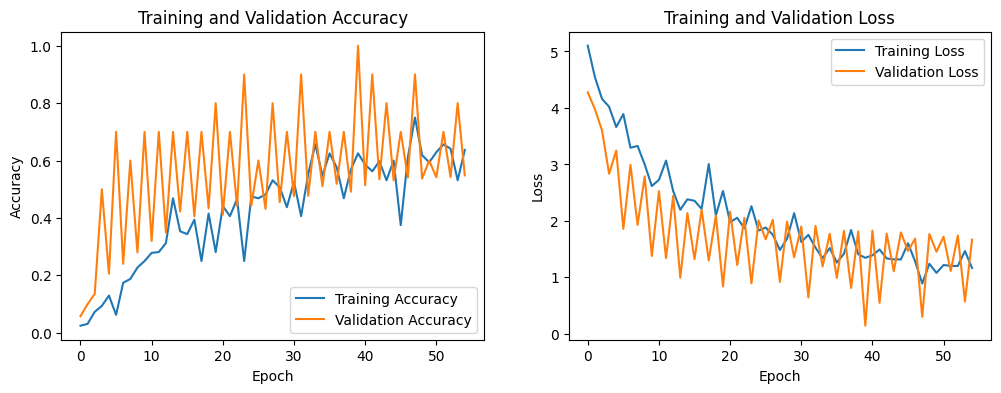

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

# Accuracy Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 664ms/step


<Figure size 800x600 with 0 Axes>

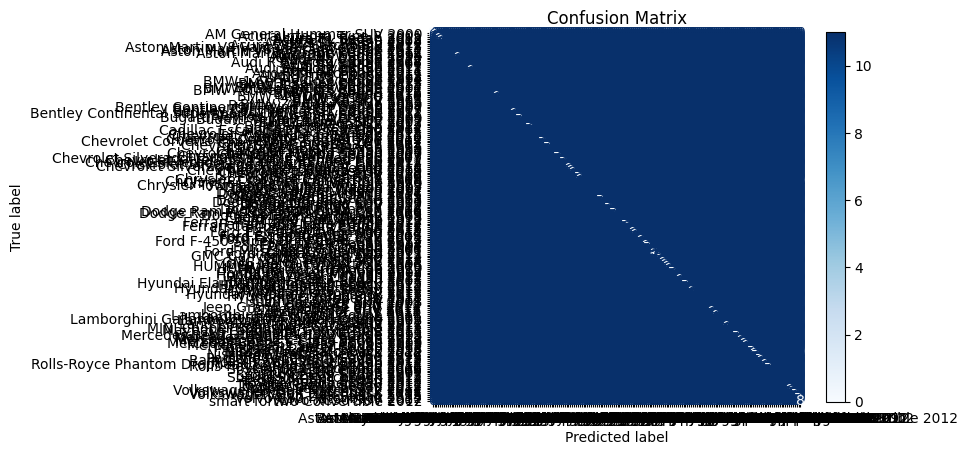

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get Ground Truth Labels and Predictions
Y_true = validation_generator.classes  # Ground truth
Y_pred = model.predict(validation_generator)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Compute Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


49/49 ━━━━━━━━━━━━━━━━━━━━ 25s 511ms/step


<Figure size 800x600 with 0 Axes>

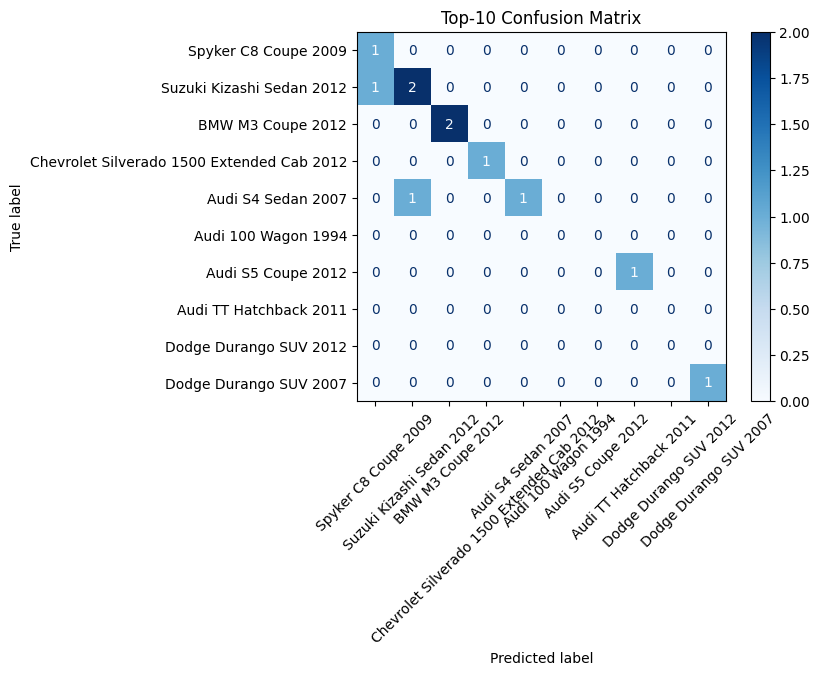

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get Ground Truth Labels and Predictions
Y_true = validation_generator.classes  # Ground truth
Y_pred = model.predict(validation_generator)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Compute Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred_classes)

# Sum of misclassifications per class
misclassifications = np.sum(cm, axis=1) - np.diag(cm)

# Select Top-K Classes with Most Misclassifications
K = 10
top_k_classes = np.argsort(misclassifications)[-K:]

# Create Reduced Confusion Matrix
cm_reduced = cm[np.ix_(top_k_classes, top_k_classes)]
class_labels = np.array(list(validation_generator.class_indices.keys()))[top_k_classes]

# Display Reduced Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_reduced, display_labels=class_labels)

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title(f"Top-{K} Confusion Matrix")
plt.show()


In [8]:
from sklearn.metrics import classification_report

# Generate Classification Report
print("Classification Report:\n")
report = classification_report(Y_true, Y_pred_classes, target_names=validation_generator.class_indices.keys())
print(report)


Classification Report:

                                                        precision    recall  f1-score   support

                            AM General Hummer SUV 2000       0.75      1.00      0.86         9
                             Acura Integra Type R 2001       0.80      0.44      0.57         9
                                   Acura RL Sedan 2012       0.00      0.00      0.00         6
                                   Acura TL Sedan 2012       0.50      0.62      0.56         8
                                  Acura TL Type-S 2008       0.54      0.88      0.67         8
                                  Acura TSX Sedan 2012       0.30      0.38      0.33         8
                              Acura ZDX Hatchback 2012       0.50      0.43      0.46         7
              Aston Martin V8 Vantage Convertible 2012       0.57      0.89      0.70         9
                    Aston Martin V8 Vantage Coupe 2012       0.33      0.25      0.29         8
               

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


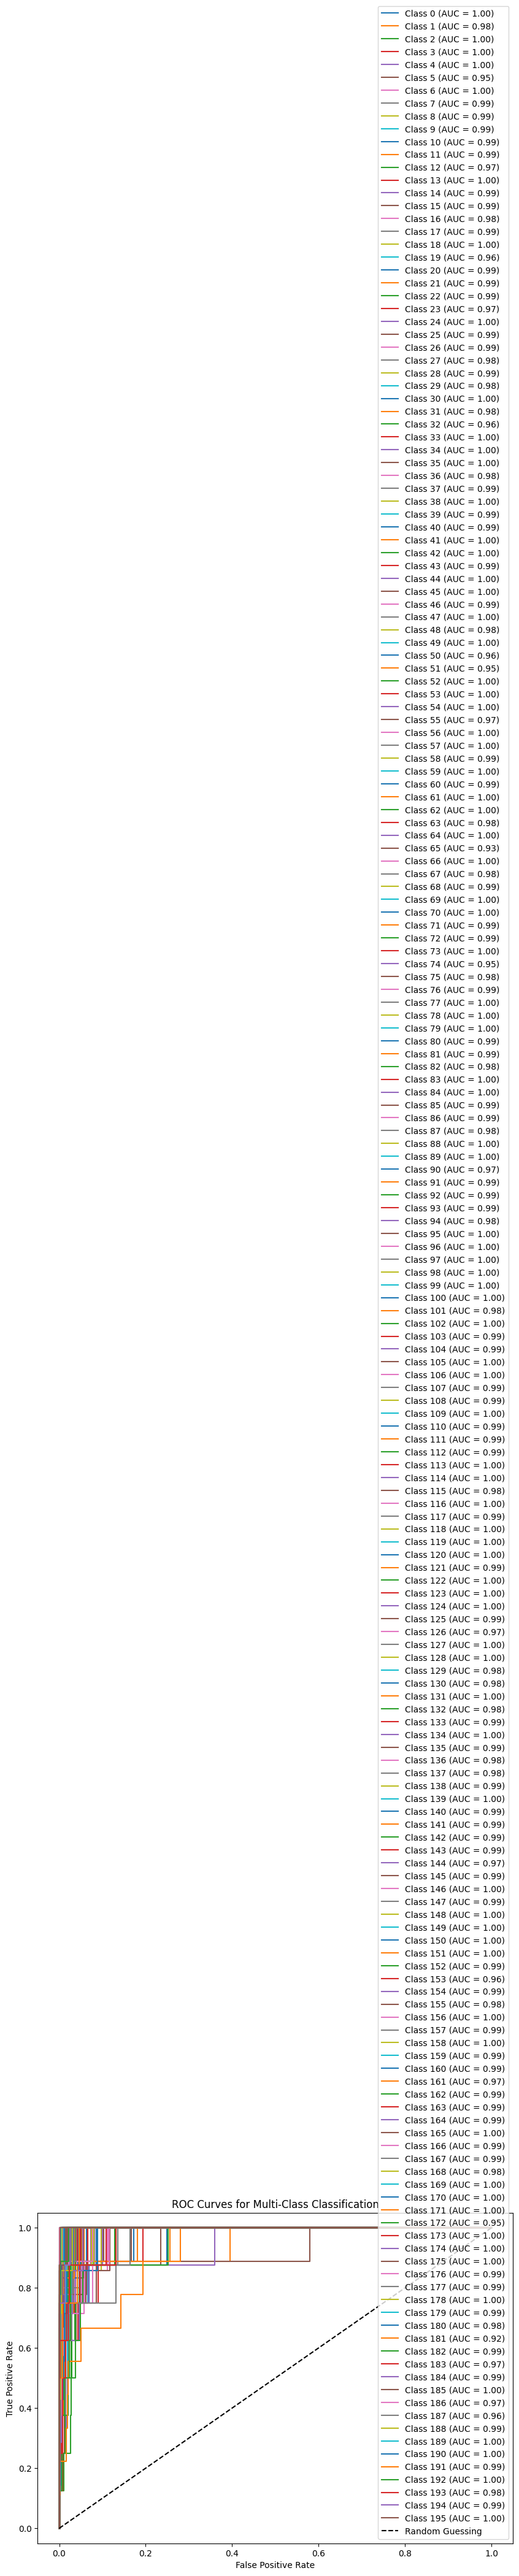

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
n_classes = len(validation_generator.class_indices)
Y_true_bin = label_binarize(Y_true, classes=[i for i in range(n_classes)])

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true_bin[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Multi-Class Classification")
plt.legend(loc="lower right")
plt.show()
